## Импорт Библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

## Чтение файла

In [ ]:
df =  pd.read_csv('/content/bikes_rent.csv')

## Небольшой просмотр файла


In [ ]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


(целевой столбец cnt - количество) в зависимости от наличия праздника, времени года, месяца, дня недели, погоды (влажность, скорость ветра, температура, средняя температура)

In [ ]:
df['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,20.310776,7.505091,2.424346,13.820424,20.431653,26.872076,35.328347
atemp,731.0,23.717699,8.148059,3.953480,16.892125,24.336650,30.430100,42.044800
hum,731.0,62.789406,14.242910,0.000000,52.000000,62.666700,73.020850,97.250000


Посмотрим на табличку корреляции

(13.5, -0.5)

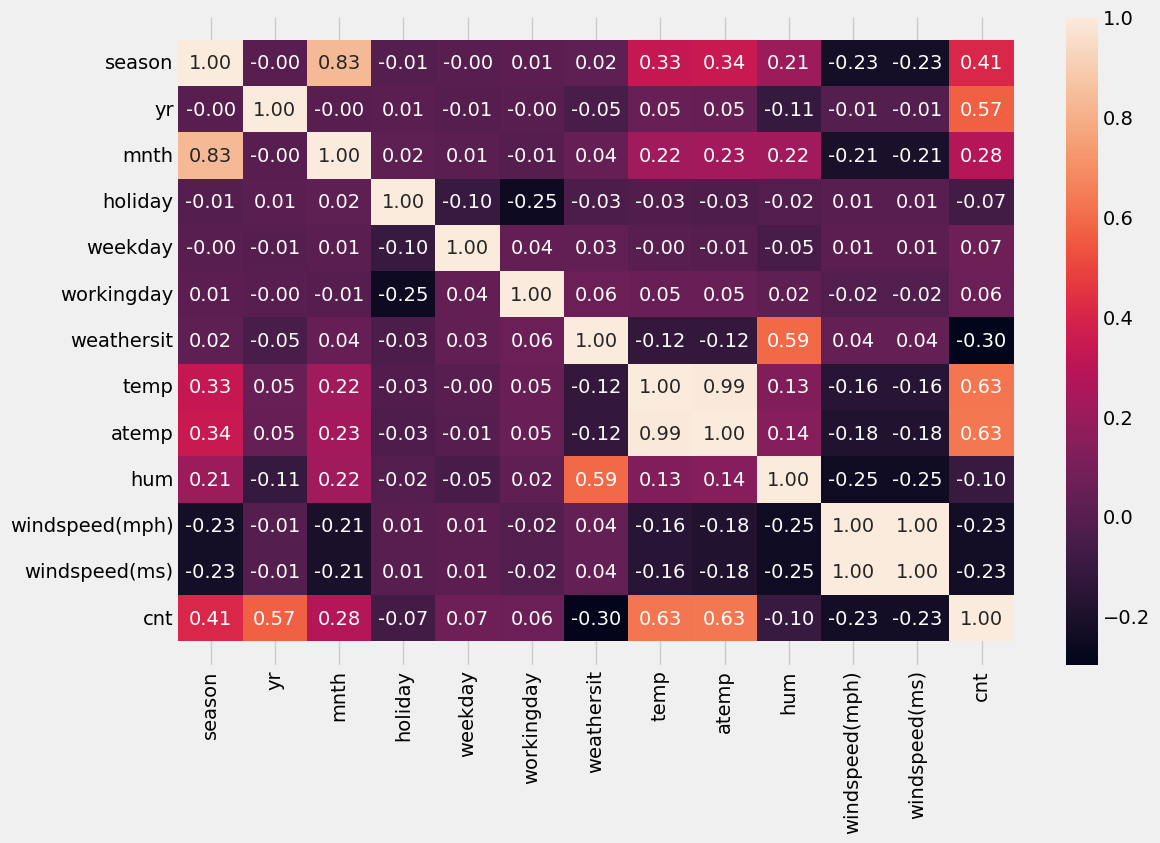

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

<Axes: >

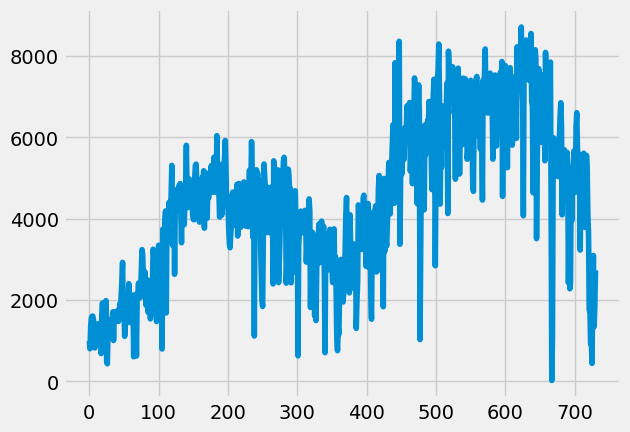

In [ ]:
df["cnt"].plot()

график количества арендованных велосипедов

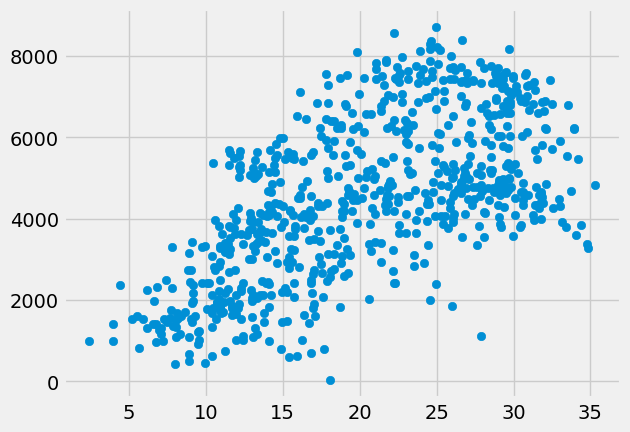

In [ ]:
plt.scatter(df["temp"], df['cnt'])

график количества арендованных велосепедов от температуры

##Линейная регрессия

In [ ]:
X = df.drop(["cnt", "atemp", "windspeed(mph)"], axis = 1)
y = df["cnt"]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         731 non-null    int64  
 1   yr             731 non-null    int64  
 2   mnth           731 non-null    int64  
 3   holiday        731 non-null    int64  
 4   weekday        731 non-null    int64  
 5   workingday     731 non-null    int64  
 6   weathersit     731 non-null    int64  
 7   temp           731 non-null    float64
 8   hum            731 non-null    float64
 9   windspeed(ms)  731 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


Выбросим из набора целевой столбец, а также столбцы atemp, windspeed(mph), сильно скореллированные c temp, windspeed(ms)

In [ ]:
X.shape, y.shape

((731, 10), (731,))

Сделаем стандартизацию

In [ ]:
X_scal = StandardScaler().fit_transform(X)

И разделим выборку на тестовую и тренировочную (70 на 30)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scal, y,
        test_size = 0.3, random_state=42)

Обучаем модель линейной регрессии

In [ ]:
linreg.fit(x_train, y_train)

LinearRegression()

и посмотрим на предсказание на тестовой выборке

In [ ]:
y_pred = linreg.predict(X_scal)

In [ ]:
y_pred.shape

(731,)

Реальное значение

In [ ]:
df["cnt"][100]

3348

Предсказанное значение

In [ ]:
y_pred[100]

3032.4950705667043

Вроде как вполне неплохо, проведем оценку качества модели

## Оценка качества

Оценим качество модели при помощи MSE

In [ ]:
np.sqrt(mean_squared_error(y_test, linreg.predict(x_test)))

838.7570311751351

Признаки и соответствующие коэффициенты

In [ ]:
X.columns, linreg.coef_

(Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'hum', 'windspeed(ms)'],
       dtype='object'),
 array([ 604.87196359,  996.00143481, -161.21797803,  -71.09750569,
         135.23987224,   79.00889089, -343.38666036,  956.01610588,
        -116.66618292, -183.87057836]))

коэффицент $w0$

In [ ]:
linreg.intercept_

4499.978906008729

Выведем коэффициенты (веса) линейной регрессии в порядке убывания:

In [ ]:
pd.DataFrame(linreg.coef_, X.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
yr,996.001435
temp,956.016106
season,604.871964
weekday,135.239872
workingday,79.008891
holiday,-71.097506
hum,-116.666183
mnth,-161.217978
windspeed(ms),-183.870578
weathersit,-343.386660


Из таблицы выше видим, что наибольшее влияние на результат оказывает признак yr (год) (поскольку имеет максимальное по модулю значение), следующий за ним - temp (температура).

Посмотрим, чему равно предсказанное значение целевого признака на первом элементе нашего датафрейма, сравним с настоящим.

In [ ]:
linreg.predict(X_scal)[0], df["cnt"][0]

(1797.6397950732298, 985)

Уже что - то не очень и правдиво, можно заметить, что по корреляционной таблице данные,  демонстрируют сильную мультиколлинеарность. Есть смысл использовать регуляризацию LASSO (L1)

In [ ]:
lasso = Lasso()
lasso.fit(x_train, y_train)
lasso.coef_, lasso.intercept_
X.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed(ms)'],
      dtype='object')

Сделаем предсказание для модели с регуляризацией LASSO и оценим качество при помощи MSE.


In [ ]:
y_pred_lasso = lasso.predict(x_test)
print(lasso.predict(x_test)[0],df['cnt'][0])
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

6184.570949271683 985


852.2438647136104

Обучим модель линейной регрессии для датафрейма, из которого не выброшены столбцы atemp, windspeed(mph)

In [ ]:
X1 = df.drop(["cnt"], axis = 1)
X1_scal, y = StandardScaler().fit_transform(X1), df["cnt"]
x_train, x_test, y_train, y_test = train_test_split(X1_scal, y,
        test_size = 0.3, random_state=42)
linreg.fit(x_train, y_train)
pd.DataFrame(linreg.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
windspeed(mph),1.326716e+13
atemp,1.442975e+03
yr,9.924547e+02
season,5.940299e+02
weekday,1.361749e+02
workingday,7.597844e+01
holiday,-6.452239e+01
hum,-1.367637e+02
mnth,-1.623455e+02
weathersit,-3.233792e+02


Как видим, модель линейной регрессии получилась плохая из-за мультиколлинеарности

Обучим модель с L1- регуляризацией с коэффициентом регуляризации 0.1, 10 (слабая и сильная регуляризация), чтобы решить проблему мультиколлинеарности. Коэффициенты при сильно скоррелированных признаках должны быть близки к нулю.

In [ ]:
lasso_weak = Lasso(alpha=0.1)
lasso_strong = Lasso(alpha=10)

In [ ]:
lasso_weak.fit(x_train, y_train)
lasso_strong.fit(x_train, y_train)
pd.DataFrame(lasso_weak.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
atemp,1.389491e+03
yr,9.909295e+02
season,5.910584e+02
weekday,1.369270e+02
workingday,7.509354e+01
windspeed(ms),-6.989402e-08
holiday,-6.464994e+01
hum,-1.368398e+02
windspeed(mph),-1.521870e+02
mnth,-1.571890e+02


In [ ]:
pd.DataFrame(lasso_strong.coef_, X1.columns, columns=["coef"]).sort_values(
    by="coef", ascending=False)

,coef
yr,9.818928e+02
atemp,9.704998e+02
season,5.333378e+02
weekday,1.277210e+02
workingday,6.908793e+01
temp,0.000000e+00
windspeed(ms),-1.093608e-08
holiday,-6.138028e+01
mnth,-9.650795e+01
hum,-1.226605e+02


Видим, что в слабой модели практически нулевое значение у коэффициента признака windspeed(ms), а в сильной у признаков temp и windspeed(ms).

Вычислим MSE на 3-х моделях и сравним.

In [ ]:
y_pred_l_w = lasso_weak.predict(x_test)
y_pred_l_s = lasso_strong.predict(x_test)
y_pred = linreg.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_pred_l_w)), np.sqrt(mean_squared_error(y_test, y_pred_l_s)),
np.sqrt(mean_squared_error(y_test, y_pred)))

864.9035838120426 849.5598356564013 866.4989265740152


In [ ]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas) # перебираем alpha на сетке от 0.1 до 10, с одинаковым шагом
lasso_cv = LassoCV(alphas=alphas,
                   cv=3, random_state=17)
lasso_cv.fit(x_train, y_train)
lasso_cv.alpha_,lasso_cv.coef_ # выведем наилучший alpha, коэффициенты

(2.935678391959799,
 array([ 5.76356014e+02,  9.89296681e+02, -1.40138584e+02, -6.50577577e+01,
         1.33871213e+02,  7.39913906e+01, -3.29760378e+02,  0.00000000e+00,
         9.71590427e+02, -1.28921157e+02, -1.58501243e+02, -1.18476113e-08]))